In [1]:
import numpy

def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

In [2]:
plane1=[
      [0, 0],
      [0, 256],
      [256, 0],
      [256, 256]
]

In [3]:
plane2=[
      [0, 0],
      [0, 256],
      [256, 100],
      [256, 230]
]

In [4]:
from PIL import ImageFont, ImageDraw, Image

In [5]:
# Imports PIL module 
import PIL 
from PIL import ImageFont, ImageDraw, Image
  
# creating a image object (new image object) with 
# RGB mode and size 200x200 

width = 256
im = PIL.Image.new(mode = "L", size = (width, width),color='white')

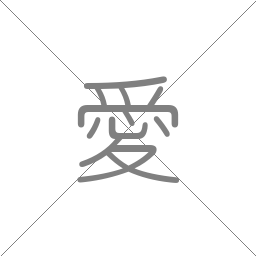

In [6]:
draw = ImageDraw.Draw(im)

fontsize = 120
font = ImageFont.truetype("/home/data/japanese/Fonts/epmarugo.ttf", fontsize)
char ="愛"

x = (width - fontsize)/2
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)
draw.text((x, x), char, font=font, fill=128)


im

In [7]:
coeff=find_coeffs(plane1,plane2)

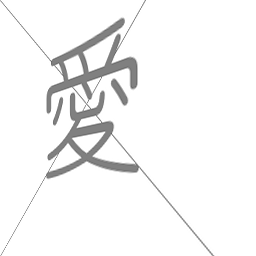

In [8]:
im.transform((width, width), Image.PERSPECTIVE, coeff,
        Image.BICUBIC)

In [9]:

from numpy import array
arr = array(im)

arr

array([[128, 255, 255, ..., 255, 255, 255],
       [255, 128, 255, ..., 255, 255, 128],
       [255, 255, 128, ..., 255, 128, 255],
       ...,
       [255, 255, 255, ..., 128, 255, 255],
       [255, 255, 128, ..., 255, 128, 255],
       [255, 128, 255, ..., 255, 255, 128]], dtype=uint8)